# PROJECT TITLE 
## customer churn prediction model


# PROJECT OBJECTIVE 
This project is tailored specifically for a Telecommunication Company. Leveraging machine learning models and advanced analytics, this project aims to  understand patterns and forecast customer churn rates within the company's subscriber base.Learn more about classification models and help the client, a telecommunication company, to understand their data.
This will help in finding the lifetime value of each customer and know what factors affect the rate at which customers stop using their services.



## 1. Business understanding

### EXPLANATION OF FEATURES
1. customerID: A unique identifier assigned to each customer
2. gender: Indicates the gender of the customer,categorized as male or female	
3. SeniorCitizen: This demographic information helps segment customers based on age.	
4. Partner: Indicates whether the customer has a partner
5. Dependents: Indicates whether the customer has dependents (e.g., children or others relying on their service)	
6. tenure: Represents the length of time (usually in months) that the customer has been subscribed to the service.
7. PhoneService: Indicates whether the customer has subscribed to phone services provided by the company.
8. MultipleLines: Indicates whether the customer has multiple phone lines as part of their service package.
9. InternetService: Specifies the type of internet service subscribed to by the customer 
10. OnlineSecurity: Indicates whether the customer has an online security add-on as part of their internet service.
11. OnlineBackup: Indicates whether the customer has an online backup service for data as part of their internet package.	
12. DeviceProtection: Indicates whether the customer has device protection services (e.g., insurance or warranty) for their devices.
13. TechSupport: Indicates whether the customer has technical support services included in their subscription.
14. StreamingTV: Indicates whether the customer has subscribed to streaming TV services from the provider.
15. StreamingMovies: Indicates whether the customer has subscribed to streaming movie services from the provider.
16. Contract: Specifies the type of contract the customer has.	
17. PaperlessBilling: Indicates whether the customer receives electronic bills instead of paper bills.	
18. PaymentMethod: Specifies the method the customer uses to make payments.	
19. MonthlyCharges: Represents the amount charged to the customer monthly for the subscribed services.	
20. TotalCharges: Represents the total amount charged to the customer over their entire tenure.
21. Churn: The target variable indicating whether the customer churned (left the service) or not.

### HYPOTHESIS
**Null Hypothesis** : There is no significant difference in churn rate based on monthly charges.     
**Alternative Hypothesis**: Customers with higher monthly charges are more likely to churn.

### RESEARCH QUESTIONS
1. Among customers who have churned, which type of contract is most prevalent? 
2. Which gender has the higest rate of churning
3. Is there a correlation between total charges and the type of contract? (Bar chart)
4. What is the percentage breakdown of customers who have left the company? (Pie chart)
5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)
6. What is the distribution of services subscribed by customers based on their tenure? (Stacked bar chart)





## 2. Data Understanding

### LIBRARY IMPORTATION

In [1]:
#Data handling 
import pandas as pd 
import numpy as np

from dotenv import dotenv_values 
import pyodbc

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import confusion_matrix

  
from sklearn.model_selection import GridSearchCV






import warnings
 
warnings.filterwarnings('ignore')


### LOAD DATASET

the first dataset is accessible remotely on a database.

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVERNAME")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
query= "select * from dbo.LP2_Telco_churn_first_3000"
data1= pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


second dataset is stored in a repository on github

In [5]:
data2= pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


third dataset is the test data and it's found in a google drive in a csv file named 'LP2_Telco-churn-second-2000'

In [6]:

data3= pd.read_csv('Telco-churn-second-2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Exploratory data analysis

Assesing the first dataset

In [7]:
data1.shape

(3000, 21)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
data1.duplicated().sum()

0

In [10]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [11]:
data1['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
data1['Contract'].value_counts()

Contract
Month-to-month    1641
Two year           746
One year           613
Name: count, dtype: int64

In [13]:
data1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:
data1['InternetService'].value_counts()

InternetService
Fiber optic    1343
DSL            1006
No              651
Name: count, dtype: int64

In [15]:
data1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [16]:
data1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
data1['tenure'].max() #to check for the customers who have stayed the longest with the company 

72

In [18]:
data1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Assesing the second dataset

In [19]:
data2.shape

(2043, 21)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [21]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
data2.duplicated().sum()

0

In [23]:
data2['Contract'].unique()


array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [24]:
data2['Contract'].value_counts()


Contract
Month-to-month    1103
Two year           498
One year           442
Name: count, dtype: int64

In [25]:
data2['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
data2['InternetService'].value_counts()

InternetService
Fiber optic    905
DSL            709
No             429
Name: count, dtype: int64

In [27]:
data2['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [28]:
data2['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
data2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [30]:
data2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
# Convert to numeric, coerce errors to NaN
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')


In [32]:
data2['TotalCharges'].dtypes

dtype('float64')

Combining the training datasets, that is the first and second dataset. This is what we are going to use in training the models we are going to build.

we notice that in the first dataset some categorical columns are in boolean values 'True' and 'False' but in the second datasets values are in 'Yes' and 'No' format. therefore we need to change that so that we will be able to concatinate them.

In [33]:

# Replace True/False values with Yes/No
data1.replace({True: 'Yes', False: 'No'}, inplace=True)

data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [34]:
trn_data= pd.concat([data1, data2], axis=0)
trn_data.reset_index(drop=True, inplace=True)
trn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [35]:
trn_data.shape

(5043, 21)

In [36]:
(trn_data['tenure']==72).sum()  #out of 3000 customers 167 stayed the longest with the company (6 years)

257

In [37]:
(trn_data['tenure']== 0).sum()    #customers who stayed for less than a month 

8

In [38]:
trn_data[trn_data['tenure']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,None,...,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,None,...,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


In [39]:

#  set the 'totalcharges' column equal to the 'monthlycharges' column for rows where 'tenure' is equal to 0
trn_data.loc[trn_data['tenure'] == 0, 'TotalCharges'] = trn_data.loc[trn_data['tenure'] == 0, 'MonthlyCharges']


In [40]:
trn_data[trn_data['tenure']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,52.549999,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,None,...,None,None,None,None,Two year,No,Mailed check,20.250000,20.250000,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,80.849998,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,None,...,None,None,None,None,Two year,No,Mailed check,25.750000,25.750000,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,56.049999,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,19.700000,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,73.350000,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,61.900000,No


In [41]:
trn_data.duplicated().sum()

0

In [42]:
#summarry statistics
trn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5043.0,2298.488381,2269.455293,18.799999,415.724997,1398.599976,3857.575073,8670.100000


In [43]:
trn_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,4,No,2525
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

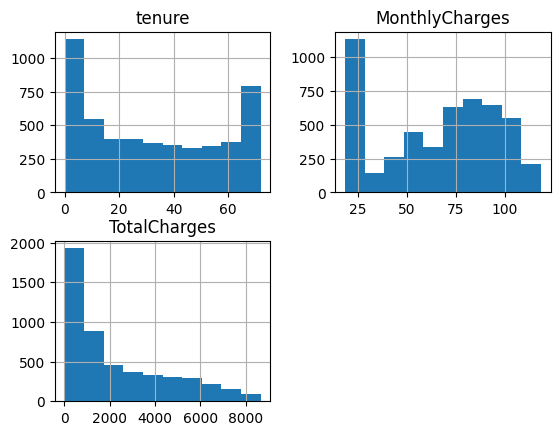

In [44]:
trn_data.hist()

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

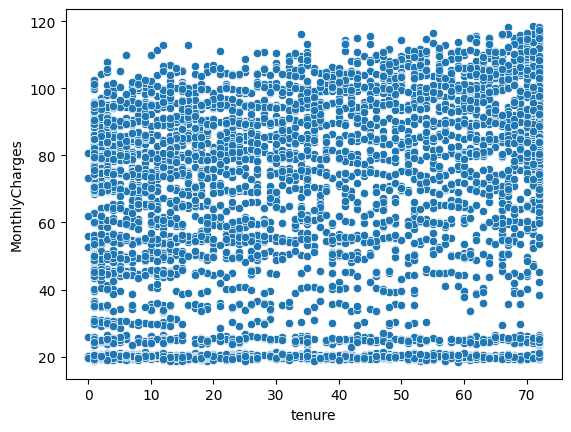

In [45]:
sns.scatterplot(data=trn_data, x='tenure', y='MonthlyCharges')

<Figure size 1200x600 with 0 Axes>

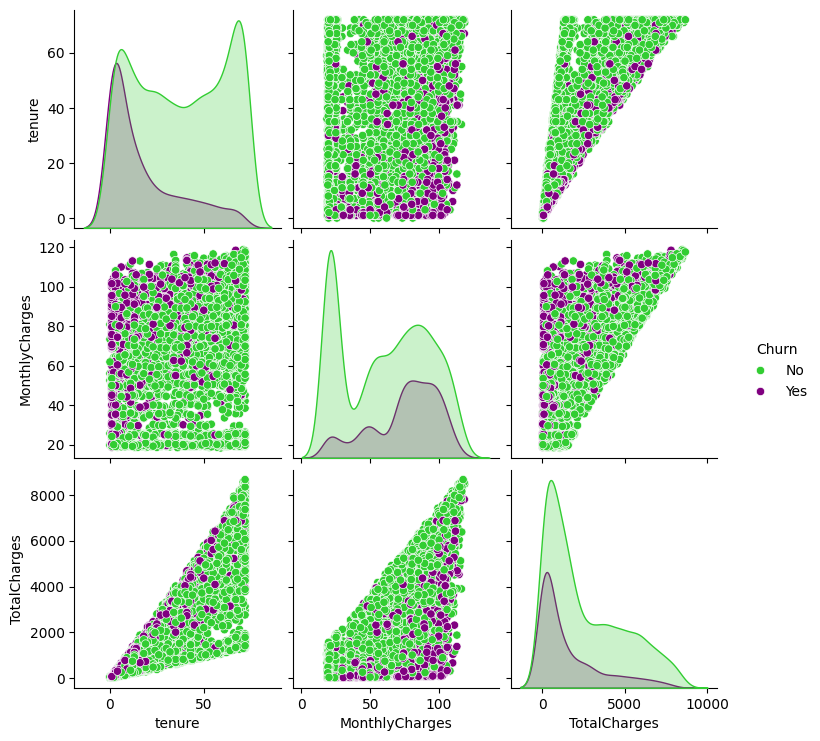

In [46]:
data = trn_data[["Churn","tenure","Contract","MonthlyCharges","TotalCharges"]]
plt.figure(figsize=(12,6))
sns.pairplot(data,hue='Churn',palette={'Yes':"purple","No":"limegreen"})
plt.show()

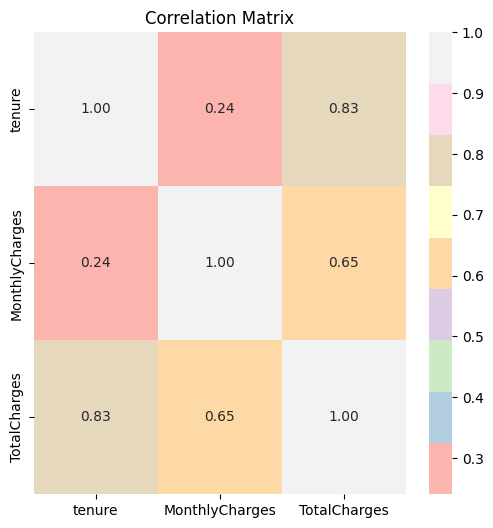

In [47]:

# Select numerical columns for correlation
numerical_columns = trn_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


save the dataset to be used in making the project dashboard

In [48]:
trn_data.to_csv('ml_dataset.csv', index=False)

Answering analytical questions 

1. Among customers who have churned, which type of contract is most prevalent? (Bar chart)

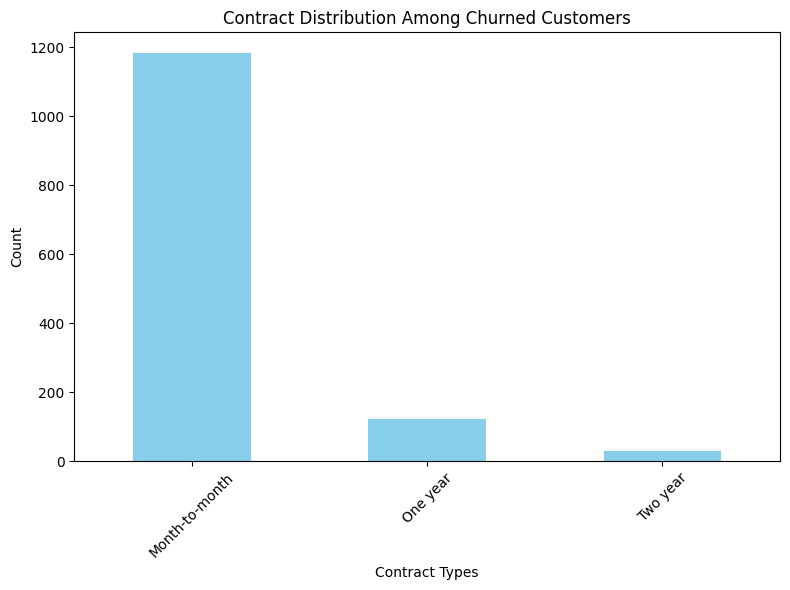

In [49]:

churned_customers = trn_data[trn_data['Churn'] == 'Yes'].reset_index()


# Count the most prevalent type of contract among churned customers
contract_counts = churned_customers['Contract'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Contract Distribution Among Churned Customers')
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



customers with a monthly renewable contract churn more compared to 1 year and 2 year contract

2. Which gender has the higest rate of churning


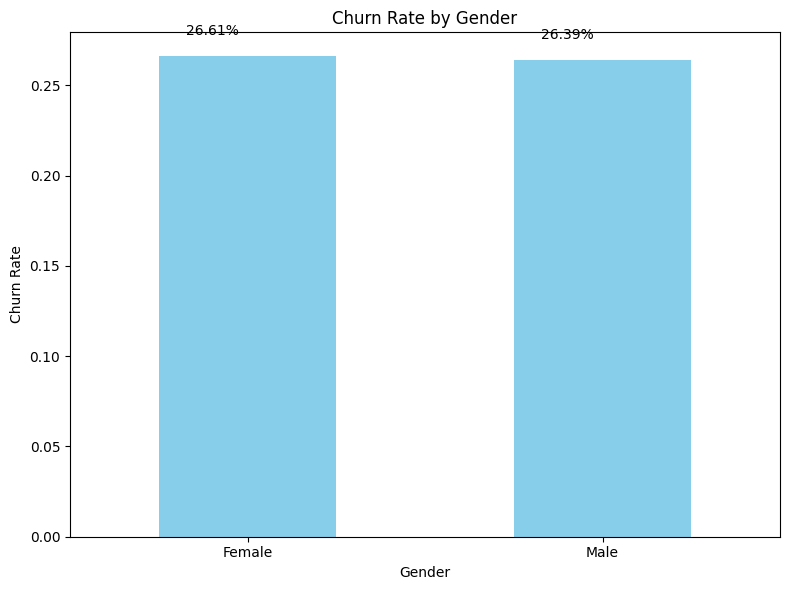

In [50]:

# Calculate churn rates by gender
churn_rates = trn_data.groupby('gender')['Churn'].value_counts(normalize=True).loc[:, 'Yes']

# Create a bar plot for churn rates by gender
plt.figure(figsize=(8, 6))
bars= churn_rates.plot(kind='bar', color='skyblue')
# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # X coordinate for label
             bar.get_height() + 0.01,  # Y coordinate for label
             f'{bar.get_height():.2%}',  # Text to display (formatted as percentage)
             ha='center', va='bottom', color='black', fontsize=10)  # Text properties

plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


churning rate between the 2 genders is almost the same

3. Is there a correlation between total charges and the type of contract? (Box plot)


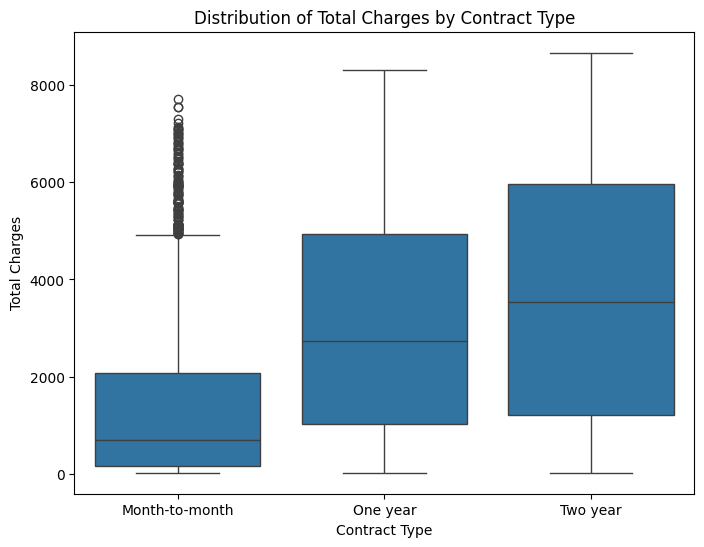

In [51]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='TotalCharges', data=trn_data)
plt.title('Distribution of Total Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')

plt.show()


because cust with a 2 year contract churn less that means they generate more revenue for the company i.e they have the highest avg total charges

4. What is the percentage breakdown of customers who have left the company? (Pie chart)


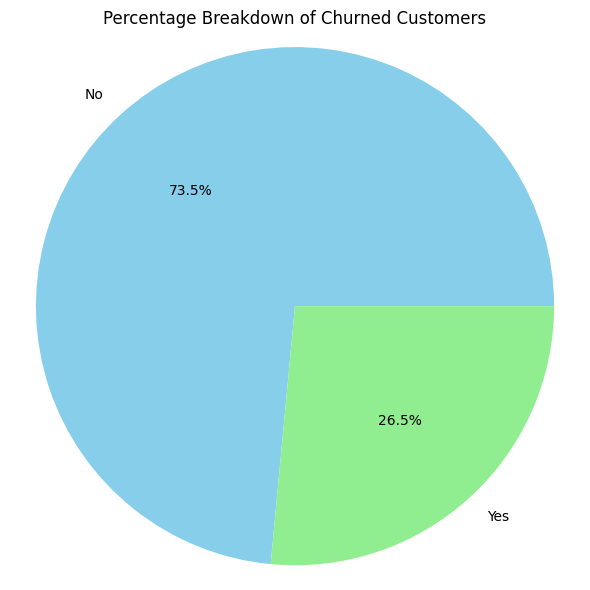

In [52]:

churn_percentage = trn_data['Churn'].value_counts(normalize=True) * 100


# Create a pie chart for the percentage breakdown of churned customers
plt.figure(figsize=(6, 6))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Percentage Breakdown of Churned Customers')
plt.axis('equal') 
plt.tight_layout()
plt.show()


5. How does the churn rate vary based on the duration of customer subscription (tenure)? (Line chart)


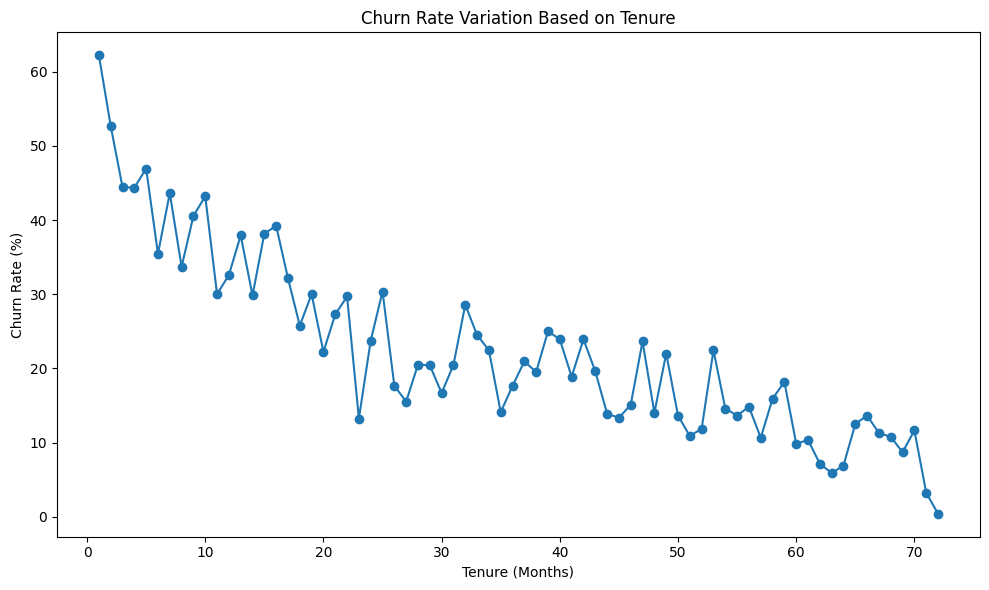

In [53]:
# Calculate churn rates for each tenure
churn_rates = trn_data.groupby('tenure')['Churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100


# Create a line chart for churn rates over tenure
plt.figure(figsize=(10, 6))
plt.plot(churn_rates.index, churn_rates.values, marker='o', linestyle='-')
plt.title('Churn Rate Variation Based on Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()



### Testing Hypothesis 
**Null Hypothesis** : There is no significant difference in churn rate based on monthly charges.     
**Alternative Hypothesis**: Customers with higher monthly charges are more likely to churn.

In [54]:


# Create a contingency table
contingency_table = pd.crosstab(trn_data['Churn'], trn_data['MonthlyCharges'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set my significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in customer churn based on monthly charges.")
else:
    print("Fail to reject the null hypothesis. There is no significantdifference in customer churn based on monthly charges .")


Reject the null hypothesis. There is a significant difference in customer churn based on monthly charges.


### Insights

   - The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
   - In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of having null values.


### Data preparation

In [55]:
trn_data.loc[trn_data['Churn'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2988,6295-OSINB,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.650002,7880.25,None


In [56]:
trn_data['Churn'].fillna(trn_data['Churn'].mode()[0], inplace=True)


In [57]:
trn_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [58]:
X= trn_data.drop('Churn', axis=1)

In [59]:
y= trn_data['Churn']

In [60]:
y.isnull().sum()

0

### split data into training and evaluation

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
463,3811-VBYBZ,Male,No,No,No,7,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.800003,673.250000
3688,9585-KKMFD,Male,0,Yes,Yes,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.000000,879.800000
1270,8780-IHCRN,Male,No,Yes,Yes,63,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Credit card (automatic),24.650000,1574.500000
2118,9779-DPNEJ,Female,No,Yes,Yes,22,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.150002,1790.650024
594,9244-ZVAPM,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.599998,45.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3926-YZVVX,Female,0,No,No,41,Yes,No,DSL,No,No,No,Yes,No,No,One year,No,Bank transfer (automatic),50.050000,2029.050000
466,9076-AXYIK,Male,Yes,Yes,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.099998,6538.450195
3092,5774-XZTQC,Female,0,Yes,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.450000,150.750000
3772,8645-KOMJQ,Male,0,Yes,Yes,69,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),81.950000,5601.400000


### Feature Engineering

In [63]:
num_column= X.select_dtypes(include='number').columns
num_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [64]:
cat_column= X.drop(['customerID','SeniorCitizen'], axis=1).select_dtypes(include='object').columns
cat_column

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [65]:

y_train= y_train.values.reshape(-1)


In [66]:
y_test= y_test.values.reshape(-1)

In [67]:
imputer = SimpleImputer(strategy='most_frequent')  # Using mean strategy, can be 'median', 'most_frequent', or 'constant'

y_train = imputer.fit_transform(y_train.reshape(-1, 1))
y_test = imputer.fit_transform(y_test.reshape(-1, 1))


### Pipelines

In [68]:
numerical_pipeline= Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

categorical_pipeline= Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, num_column),
    ('categorical_pipeline',categorical_pipeline, cat_column),
])

In [69]:
X_transform=pd.DataFrame(preprocessor.fit_transform(X),columns=preprocessor.get_feature_names_out())
X_transform


,numerical_pipeline__tenure,numerical_pipeline__MonthlyCharges,numerical_pipeline__TotalCharges,categorical_pipeline__gender_Female,categorical_pipeline__gender_Male,categorical_pipeline__Partner_No,categorical_pipeline__Partner_Yes,categorical_pipeline__Dependents_No,categorical_pipeline__Dependents_Yes,categorical_pipeline__PhoneService_No,...,categorical_pipeline__StreamingMovies_None,categorical_pipeline__Contract_Month-to-month,categorical_pipeline__Contract_One year,categorical_pipeline__Contract_Two year,categorical_pipeline__PaperlessBilling_No,categorical_pipeline__PaperlessBilling_Yes,categorical_pipeline__PaymentMethod_Bank transfer (automatic),categorical_pipeline__PaymentMethod_Credit card (automatic),categorical_pipeline__PaymentMethod_Electronic check,categorical_pipeline__PaymentMethod_Mailed check
0,-0.595745,-0.749885,-0.397679,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.106383,-0.250576,0.142627,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.574468,-0.307692,-0.374929,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.340426,-0.520498,0.128463,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.574468,0.002764,-0.362291,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,-0.106383,0.262552,0.171971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5039,0.914894,0.601566,1.732876,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5040,-0.382979,-0.754491,-0.305693,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5041,-0.531915,0.070935,-0.317271,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Label Encoding

In [70]:
label_encoder= LabelEncoder()
y_train_encoded= label_encoder.fit_transform(y_train)
y_test_encoded= label_encoder.transform(y_test)

### ML Pipeline - unbalanced

In [71]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)),
])

decision_tree_pipeline.fit(X_train,y_train_encoded )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Evaluate

In [72]:
y_pred = decision_tree_pipeline.predict(X_test)

In [73]:
y_true = y_test_encoded

print(classification_report(y_true , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       734
           1       0.49      0.50      0.50       275

    accuracy                           0.72      1009
   macro avg       0.65      0.65      0.65      1009
weighted avg       0.73      0.72      0.72      1009



In [74]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [75]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42)),
])

svc_pipeline.fit(X_train,y_train_encoded )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [76]:
y_true= y_test_encoded

svc_pred= svc_pipeline.predict(X_test)
print(classification_report(y_true, svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       734
           1       0.70      0.51      0.59       275

    accuracy                           0.81      1009
   macro avg       0.77      0.71      0.73      1009
weighted avg       0.80      0.81      0.80      1009



In [77]:


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('rf_classifier', RandomForestClassifier(random_state=42))])

In [78]:
rf_pred= rf_pipeline.predict(X_test)

In [79]:
print(classification_report(y_test_encoded, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       734
           1       0.63      0.52      0.57       275

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009



In [80]:

# Define the KNN pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        # Preprocessing steps
    ('knn_classifier', KNeighborsClassifier())  # KNN classifier
    ])
# Set random seed for the entire Python environment

# Fit the KNN pipeline on the training data
knn_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('knn_classifier', KNeighborsClassifier())])

In [81]:
knn_pred = knn_pipeline.predict(X_test)

In [82]:
# Generate a classification report
report_knn = classification_report(y_test_encoded, knn_pred)

# Print the classification report
print(report_knn)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       734
           1       0.57      0.55      0.56       275

    accuracy                           0.76      1009
   macro avg       0.70      0.70      0.70      1009
weighted avg       0.76      0.76      0.76      1009



### Compare Models

In [83]:
models= [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('svc_classifier', SVC(random_state=42, probability= True)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn2_classifier', KNeighborsClassifier()),
]


for model_name, classifier  in models:
    pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
    ])

    pipeline.fit(X_train, y_train_encoded)

    y_pred= pipeline.predict(X_test)

    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('='* 50)

    

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       734
           1       0.63      0.52      0.57       275

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       734
           1       0.63      0.52      0.57       275

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       734
           1       0.63      0.52      0.57       275

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1

### Train on unbalanced dataset 

In [84]:
unbalanced_metrics = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_Score'])


for model_name, classifier in models:


    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
   
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)


    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)


   


    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    Accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['precision']
    f1_score = metrics['weighted avg']['precision']
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name,Accuracy,precision,recall,f1_score]



In [85]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1_Score
0,tree_classifier,0.723489,0.725070,0.725070,0.725070
1,svc_classifier,0.806739,0.796797,0.796797,0.796797
2,rf_classifier,0.785927,0.776661,0.776661,0.776661
3,knn2_classifier,0.763132,0.760764,0.760764,0.760764


### Train and compare balanced data set- SMOTE

In [86]:


smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for model_name, classifier in models:
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)

    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']

    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

smote_df


,Model_name,Accuracy,Precision,Recall,F1_Score
0,tree_classifier,0.724480,0.736997,0.724480,0.729722
1,svc_classifier,0.789891,0.814498,0.789891,0.797176
2,rf_classifier,0.787909,0.786036,0.787909,0.786918
3,knn2_classifier,0.672944,0.744701,0.672944,0.690198


In [87]:


sampler= RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled= sampler.fit_resample(X_train, y_train_encoded)

In [88]:
X_train_resampled.shape

(5946, 20)

In [89]:
pd.DataFrame(y_train_resampled).value_counts()

0    2973
1    2973
Name: count, dtype: int64

In [90]:
models= [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('svc_classifier', SVC(random_state=42, probability = True)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn2_classifier', KNeighborsClassifier()),
]


for model_name, classifier  in models:
    pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
    ])

    pipeline.fit(X_train_resampled, y_train_resampled)

    y_pred= pipeline.predict(X_test)

    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('='* 50)

    

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       734
           1       0.60      0.62      0.61       275

    accuracy                           0.78      1009
   macro avg       0.73      0.73      0.73      1009
weighted avg       0.79      0.78      0.78      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       734
           1       0.60      0.62      0.61       275

    accuracy                           0.78      1009
   macro avg       0.73      0.73      0.73      1009
weighted avg       0.79      0.78      0.78      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       734
           1       0.60      0.62      0.61       275

    accuracy                           0.78      1009
   macro avg       0.73      0.73      0.73      1

### Feature importance and Selection

In [91]:

selection = SelectKBest(mutual_info_classif,k='all')

In [92]:


fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline = {}

for model_name, classifier in models:

    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance',selection),
        ('classifier', classifier),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)
    all_pipeline[model_name] = pipeline


    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

fi_smote_df 



,Model_name,Accuracy,Precision,Recall,F1_Score
0,tree_classifier,0.724480,0.736997,0.724480,0.729722
1,svc_classifier,0.789891,0.814498,0.789891,0.797176
2,rf_classifier,0.787909,0.786036,0.787909,0.786918
3,knn2_classifier,0.672944,0.744701,0.672944,0.690198


### Visualise ROC Curve - Overlaapping

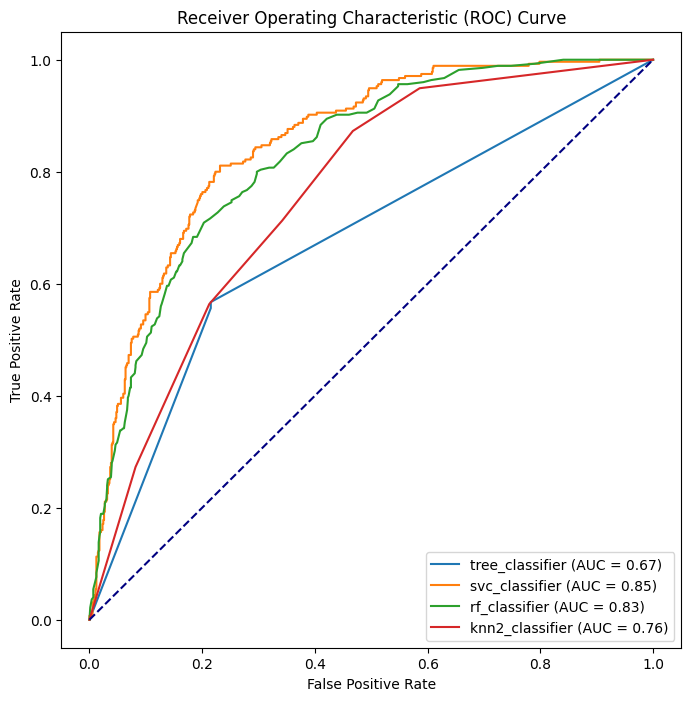

In [93]:


fig, ax = plt.subplots(figsize=(8, 8))
roc_curve_data = {}

for model_name, classifier in models:
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier),
    ])

    pipeline.fit(X_train, y_train_encoded)

    y_score = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate':fpr,'True Positive Rate':tpr,'Threshold':threshold})
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()


In [94]:
roc_curve_data['rf_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.001362,0.021818,1.00
2,0.004087,0.036364,0.99
3,0.006812,0.040000,0.98
4,0.006812,0.054545,0.97
...,...,...,...
111,0.724796,0.989091,0.04
112,0.747956,0.989091,0.03
113,0.788828,0.992727,0.02
114,0.840599,1.000000,0.01


In [95]:

forest_pipeline = all_pipeline['rf_classifier']
forest_y_pred = forest_pipeline.predict(X_test)
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

<Axes: >

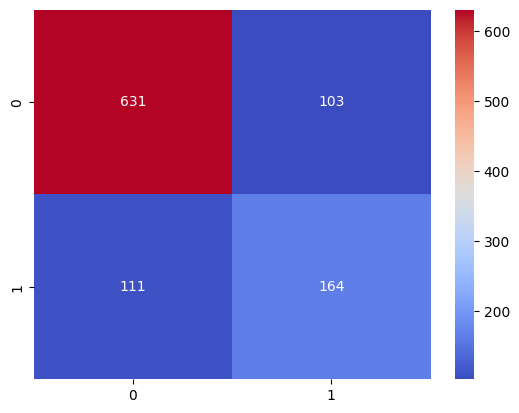

In [96]:
sns.heatmap(data=matrix,annot=True,fmt='d',cmap='coolwarm')

In [97]:
threshold = 0.02
y_pred_proba = forest_pipeline.predict_proba(X_test)[:,1]

binary_prediction = (y_pred_proba > threshold)
threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction )
threshold_matrix

array([[185, 549],
       [  3, 272]], dtype=int64)

In [98]:
roc_curve_data['svc_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003636,0.948430
2,0.000000,0.007273,0.945910
3,0.005450,0.007273,0.930484
4,0.005450,0.029091,0.918826
...,...,...,...
260,0.798365,0.992727,0.039902
261,0.798365,0.996364,0.039423
262,0.904632,0.996364,0.022196
263,0.904632,1.000000,0.022126


### Hyperparameter tuning 

In [100]:


param_grid = {
    'feature_importance__k': [5],
    'classifier__n_estimators': [5],  # Corrected parameter name
    'classifier__max_depth': [None],
    'classifier__min_samples_split': [2]
}

grid_search = GridSearchCV(
    forest_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

grid_search.fit(X_train, y_train_encoded)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('categorical_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy...
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000000170E673560>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None],
                         'classifier__min_samples_split': [2],
                         'classifier__n_estimators': [5],
                         'feature_importance__k': [5]},
             scoring='f1')

In [101]:
best_parametres = grid_search.best_params_
best_parametres

{'classifier__max_depth': None,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 5,
 'feature_importance__k': 5}

### Retrain Model with Best Parameters

In [102]:
forest_pipeline.set_params(**best_parametres)
forest_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder...
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x000000170E673560>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=5, random_state=42))])

### Save the model

In [110]:
pickle.dump(RandomForestClassifier, open('Random_Model.pkl', 'wb'))
pickle.dump(SVC, open('svc_model.pkl','wb'))

### Evaluate model with test dataset 

In [111]:
with open('Random_Model.pkl', 'rb') as file:
    loaded_model1 = pickle.load(file)

with open('svc_model.pkl', 'rb') as file:
    loaded_model2 = pickle.load(file)



In [ ]:

encoder_model_tuple = (OneHotEncoder, loaded_model1, loaded_model2)

# Save the tuple using pickle
with open('encoder_models.pkl', 'wb') as file:
    pickle.dump(encoder_model_tuple, file)


In [112]:
pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

,numerical_pipeline__tenure,numerical_pipeline__MonthlyCharges,numerical_pipeline__TotalCharges,categorical_pipeline__gender_Female,categorical_pipeline__gender_Male,categorical_pipeline__Partner_No,categorical_pipeline__Partner_Yes,categorical_pipeline__Dependents_No,categorical_pipeline__Dependents_Yes,categorical_pipeline__PhoneService_No,...,categorical_pipeline__StreamingMovies_None,categorical_pipeline__Contract_Month-to-month,categorical_pipeline__Contract_One year,categorical_pipeline__Contract_Two year,categorical_pipeline__PaperlessBilling_No,categorical_pipeline__PaperlessBilling_Yes,categorical_pipeline__PaymentMethod_Bank transfer (automatic),categorical_pipeline__PaymentMethod_Credit card (automatic),categorical_pipeline__PaymentMethod_Electronic check,categorical_pipeline__PaymentMethod_Mailed check
0,-0.500000,0.533821,-0.213431,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.239130,-0.925046,-0.152878,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.717391,-0.840037,0.050783,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.173913,0.174589,0.114151,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.630435,-0.457038,-0.397435,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.239130,-0.375686,0.184041,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4030,0.739130,0.575868,1.506034,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,-0.500000,-0.916819,-0.366609,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4032,0.847826,0.207495,1.231325,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
